In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] =  200
plt.style.use('default')

In [2]:
def create_graph(path: str):
    preferences_matrix = pd.read_csv(path, index_col=False, header=None).values
    strict_matrix = (preferences_matrix == 1).astype(int)
    positive_matrix, negative_matrix = preferences_matrix.copy(), preferences_matrix.copy()
    positive_matrix[positive_matrix > 0] = 0
    negative_matrix[negative_matrix < 0] = 0
    strict_graph = nx.from_numpy_array(strict_matrix)
    positive_graph = nx.from_numpy_array(positive_matrix)
    negative_graph = nx.from_numpy_array(negative_matrix)
    graph = nx.from_numpy_array(preferences_matrix)
    return strict_graph, positive_graph, negative_graph, graph

def draw_strict_graph(graph: nx.Graph, labels: pd.Series = None):
    nx.draw(graph,
            with_labels=True,
            node_color="lightgreen",
            font_color="black",
            labels=labels
            )

def get_graph_edge_labels(graph: nx.Graph):
    edge_labels = {(edge[0], edge[1]): edge[-1]["weight"]
                   for edge in list(list(graph.edges(data=True)))}
    negative_edges = pd.Series(edge_labels).index[np.where(pd.Series(edge_labels) < 0)].to_list()
    positive_edges = pd.Series(edge_labels).index[np.where(pd.Series(edge_labels) > 0)].to_list()
    negative_edge_labels = pd.Series(edge_labels).iloc[np.where(pd.Series(edge_labels) < 0)].to_dict()
    positive_edge_labels = pd.Series(edge_labels).iloc[np.where(pd.Series(edge_labels) > 0)].to_dict()
    return edge_labels, negative_edges, positive_edges, negative_edge_labels, positive_edge_labels

def draw_graph(graph: nx.Graph,
               labels: pd.Series = None,
               color_friends: str = "green",
               color_enemies: str = "red",
               coloring: np.ndarray = None):
    pos = nx.circular_layout(graph, scale=10)
    options = {"edgecolors": "gray", "node_size": 800, "alpha": 0.9}
    edge_labels, negative_edges, positive_edges, negative_edge_labels, positive_edge_labels = get_graph_edge_labels(graph)
    if coloring is not None:
        node_color = [plt.cm.tab10(color) for color in coloring]
    else:
        node_color = "purple"
    nx.draw_networkx_nodes(graph, pos, node_color=node_color, **options)
    nx.draw_networkx_edges(graph, pos, width=1, alpha=0.5)
    nx.draw_networkx_edges(graph, pos, edgelist=positive_edges, width=8, alpha=0.5, edge_color=color_enemies)
    nx.draw_networkx_edges(graph, pos, edgelist=negative_edges, width=8, alpha=0.5, edge_color=color_friends)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=positive_edge_labels, font_color=color_enemies, font_size=18)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=negative_edge_labels, font_color=color_friends, font_size=18)
    nx.draw_networkx_labels(graph, pos, labels, font_size=22, font_color="white")

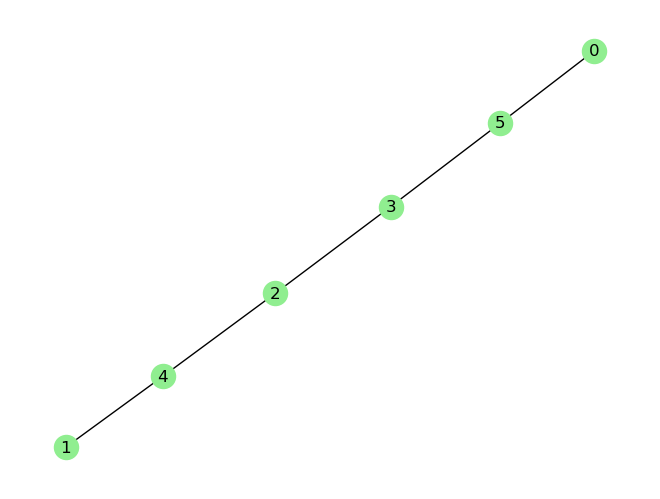

In [3]:
Gs, Gp, Gn, G = create_graph("Friends.csv")
draw_strict_graph(Gs)

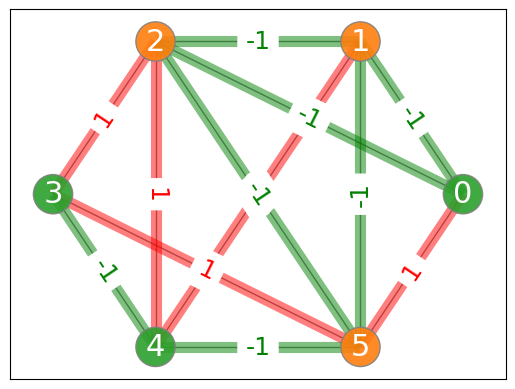

In [4]:
draw_graph(G, coloring=np.array([2, 1, 1, 2, 2, 1]))